# Student-Faculty Ratios (Avg Class Sizes)
__Question__: Our department chair, prof. Wei, wants to see if the teaching load for the Math Dept is higher than for the other departments of SSH.

Use the attached file to 
1. find an average class size (ACS) for each department, which is (# number of students taking the courses in a particular department) / ( #number of professors in that department)
2. visualize ACSs across departments with a bar chart, and 
3. test the hypothesis:
<center>
$H_0$: ACS in Math = ACS in all other depts
<br>
$H_1$: ACS in Math > ACS in all other depts
<center>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Reading

In [2]:
pd_data = pd.read_excel('list.xls')

In [3]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #                     601 non-null    int64  
 1   Course ID             601 non-null    int64  
 2   Course Abbr           601 non-null    object 
 3   S/T                   601 non-null    object 
 4   Course Title          601 non-null    object 
 5   Cr                    601 non-null    float64
 6   Days                  574 non-null    object 
 7   Time                  601 non-null    object 
 8   Enr                   601 non-null    int64  
 9   Students in waitlist  601 non-null    int64  
 10  Waitlist cap          601 non-null    int64  
 11  Appr                  601 non-null    int64  
 12  Not Appr              601 non-null    int64  
 13  Cap                   601 non-null    int64  
 14  Faculty               601 non-null    object 
 15  Room                  5

In [4]:
pd_data

,#,Course ID,Course Abbr,S/T,Course Title,Cr,Days,Time,Enr,Students in waitlist,Waitlist cap,Appr,Not Appr,Cap,Faculty,Room,Start Date,Finish Date,School,Level
0,1,227,ANT 140,1L,World Prehistory,3.0,T R,03:00 PM-04:15 PM,118,0,10,0,118,120,Paula Dupuy,Online,17-AUG-20,27-NOV-20,SSH,UG
1,2,1035,ANT 262,1L,Monkey business: Primate Society and Behavior,3.0,T R,10:30 AM-11:45 AM,20,0,10,2,18,24,Reed Coil,Online,17-AUG-20,27-NOV-20,SSH,UG
2,3,2961,ANT 280,1L,Introduction to Medical Anthropology,3.0,T R,12:00 PM-01:15 PM,24,0,10,0,24,24,Ramey Moore,Online,17-AUG-20,27-NOV-20,SSH,UG
3,4,4471,ANT 281/SOC 281,1L,"Health, Illness and Society",3.0,M W F,04:00 PM-04:50 PM,23,0,10,2,21,24,Ronald Moore,Online,17-AUG-20,27-NOV-20,SSH,UG
4,5,4736,ANT 333,1L,Anthropology of Space,3.0,T R,12:00 PM-01:15 PM,11,0,10,1,10,24,Reed Coil,Online,17-AUG-20,27-NOV-20,SSH,UG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,597,3604,WLL 246,1L,Survey of Contemporary Russian Literature and ...,3.0,M W F,12:00 PM-12:50 PM,20,0,10,1,19,25,Victoria Thorstensson,Online,17-AUG-20,27-NOV-20,SSH,UG
597,598,2487,WLL 257,1L,Fan Culture in the Age of Convergence,3.0,T R,12:00 PM-01:15 PM,20,0,10,1,19,20,Jenni Lehtinen,Online,17-AUG-20,27-NOV-20,SSH,UG
598,599,5709,WLL 315,1L,Shakespeare,3.0,M W F,01:00 PM-01:50 PM,10,0,10,0,10,24,James Nikopoulos,Online,17-AUG-20,27-NOV-20,SSH,UG
599,600,3672,WLL 385/ANT 385,1L,Postcolonial Theory and its Applications in Eu...,3.0,M W F,12:00 PM-12:50 PM,24,0,10,2,22,24,Alima Bissenova,Online,17-AUG-20,27-NOV-20,SSH,UG


# Data Cleaning

To answer the question some columns are redundant. There are: "#", "Course ID", "S/T", "Course Title", "Cr", "Days", "Time", "Students in waitlist", "Waitlist cap", "Appr", "Not Appr", "Room", "Start Date", "Finish Date", "School", "Level".

In [5]:
pd_data_1 = pd_data.drop(["#", "Course ID", "S/T", "Course Title", "Cr", "Days", "Time",
                            "Students in waitlist", "Waitlist cap", "Appr", "Not Appr", "Cap",
                            "Room", "Start Date", "Finish Date", "School", "Level"], axis = 1, inplace = False)

In [6]:
pd_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Course Abbr  601 non-null    object
 1   Enr          601 non-null    int64 
 2   Faculty      601 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


In [7]:
pd_data_1

,Course Abbr,Enr,Faculty
0,ANT 140,118,Paula Dupuy
1,ANT 262,20,Reed Coil
2,ANT 280,24,Ramey Moore
3,ANT 281/SOC 281,23,Ronald Moore
4,ANT 333,11,Reed Coil
...,...,...,...
596,WLL 246,20,Victoria Thorstensson
597,WLL 257,20,Jenni Lehtinen
598,WLL 315,10,James Nikopoulos
599,WLL 385/ANT 385,24,Alima Bissenova


I would like to separate the data into different departments. Base information about the relation of a certain course to the certain department is taken from the attached site. <a href="https://registrar.nu.edu.kz/course-catalog">[Site]</a>
<br> <br>
Some courses belong to 2 departments. In this case, I include them in two departments at the same time. For example, HST 223/ANT 287 is related to the "Department of Sociology and Anthropology" and the "Department of History, Philosophy, and Religious Studies", thus I add this course to them.

In [8]:
course_abbr = np.array([i[:4] for i in pd_data_1["Course Abbr"].unique()])
print(np.unique(course_abbr))

['ANT ' 'BIOL' 'CHEM' 'CHN ' 'EAS ' 'ECON' 'FRE ' 'HST ' 'KAZ ' 'KFL '
 'KOR ' 'LING' 'MATH' 'PHIL' 'PHYS' 'PLS ' 'REL ' 'SHSS' 'SOC ' 'SPA '
 'SSH ' 'TUR ' 'WCS ' 'WLL ']


In [9]:
### Departments with single Course Abbr ###
list_biol = [True if 'BIOL' in i else False for i in pd_data_1['Course Abbr']]
list_chem = [True if 'CHEM' in i else False for i in pd_data_1['Course Abbr']]
list_econ = [True if 'ECON' in i else False for i in pd_data_1['Course Abbr']]
list_phys = [True if 'PHYS' in i else False for i in pd_data_1['Course Abbr']]
list_math = [True if 'MATH' in i else False for i in pd_data_1['Course Abbr']]
list_pls = [True if 'PLS' in i else False for i in pd_data_1['Course Abbr']] # Department of Political Science #
list_eas = [True if 'EAS' in i else False for i in pd_data_1['Course Abbr']] # Department of Area Studies #
list_wcs = [True if 'WCS' in i else False for i in pd_data_1['Course Abbr']] # Department of Communication and Composition #

### Department of Sociology and Anthropology ###
list_ant = [True if 'ANT' in i else False for i in pd_data_1['Course Abbr']]
list_soc = [True if 'SOC' in i else False for i in pd_data_1['Course Abbr']]

### Department of History, Philosophy and Religious Studies ###
list_hst = [True if 'HST' in i else False for i in pd_data_1['Course Abbr']]
list_phil = [True if 'PHIL' in i else False for i in pd_data_1['Course Abbr']]
list_rel = [True if 'REL' in i else False for i in pd_data_1['Course Abbr']]

### Department of Kazakh language and Turkic Studies ###
list_kaz = [True if 'KAZ' in i else False for i in pd_data_1['Course Abbr']]
list_tur = [True if 'TUR' in i else False for i in pd_data_1['Course Abbr']]
list_kfl = [True if 'KFL' in i else False for i in pd_data_1['Course Abbr']]

### Department of Languages, Literature and Linguistics ###
list_chn = [True if 'CHN' in i else False for i in pd_data_1['Course Abbr']]
list_fre = [True if 'FRE' in i else False for i in pd_data_1['Course Abbr']]
list_kor = [True if 'KOR' in i else False for i in pd_data_1['Course Abbr']]
list_ling = [True if 'LING' in i else False for i in pd_data_1['Course Abbr']]
list_spa = [True if 'SPA' in i else False for i in pd_data_1['Course Abbr']]
list_wll = [True if 'WLL' in i else False for i in pd_data_1['Course Abbr']]

### Deparment of SHSS and SSH ###
list_ssh = [True if 'SSH' in i else False for i in pd_data_1['Course Abbr']]
list_shss = [True if 'SHSS' in i else False for i in pd_data_1['Course Abbr']]

In [10]:
### Departments with single Course Abbr ###
pd_biol = pd_data_1.loc[list_biol, :]
pd_chem = pd_data_1.loc[list_chem, :]
pd_econ = pd_data_1.loc[list_econ, :]
pd_phys = pd_data_1.loc[list_phys, :]
pd_math = pd_data_1.loc[list_math, :]
pd_pls = pd_data_1.loc[list_pls, :] # Department of Political Science #
pd_eas = pd_data_1.loc[list_eas, :] # Department of Area Studies #
pd_wcs = pd_data_1.loc[list_wcs, :] # Department of Communication and Composition #

In [11]:
### Department of Sociology and Anthropology ###
pd_ant = pd_data_1.loc[list_ant, :]
pd_soc = pd_data_1.loc[list_soc, :]
pd_soc_ant = pd_ant.append(pd_soc).drop_duplicates()

In [12]:
### Department of History, Philosophy and Religious Studies ###
pd_hst = pd_data_1.loc[list_hst, :]
pd_phil = pd_data_1.loc[list_phil, :]
pd_rel = pd_data_1.loc[list_rel, :]
pd_hst_phil_rel = pd_hst.append(pd_phil).append(pd_rel).drop_duplicates()

In [13]:
### Department of Kazakh language and Turkic Studies ###
pd_kaz = pd_data_1.loc[list_kaz, :]
pd_tur = pd_data_1.loc[list_tur, :]
pd_kfl = pd_data_1.loc[list_kfl, :]
pd_kaz_tur = pd_kaz.append(pd_tur).append(pd_kfl).drop_duplicates()

In [14]:
### Department of Languages, Literature and Linguistics ###
pd_chn = pd_data_1.loc[list_chn, :]
pd_fre = pd_data_1.loc[list_fre, :]
pd_kor = pd_data_1.loc[list_kor, :]
pd_ling = pd_data_1.loc[list_ling, :]
pd_spa = pd_data_1.loc[list_spa, :]
pd_wll = pd_data_1.loc[list_wll, :]
pd_lan_lit_ling = pd_chn.append(pd_fre).append(pd_kor).append(pd_ling).append(pd_spa).append(pd_wll).drop_duplicates()

In [15]:
### Deparment of SHSS and SSH ###
pd_ssh = pd_data_1.loc[list_ssh, :]
pd_shss = pd_data_1.loc[list_shss, :]
pd_shss = pd_ssh.append([pd_shss]).drop_duplicates()

# Data Analysis
1. Find an average class size (ACS) for each department, which is (# number of students taking the courses in a particular department) / ( #number of professors in that department)
<br><br>
\n is written for clarity of bar chart

In [19]:
dict_acs = {'Department': ['Biological Science', 'Chemistry', 'Economics', 'Physics', 'Mathematics', 'Political\nScience\nand\nInternational\nRelations',
                           'Area Studies', 'Communication\nand\nComposition', 'Sociology\nand\nAnthropology', 'History,\nPhilosophy\nand\nReligious Studies',
                           'Kazakh language\nand\nTurkic Studies', 'Languages,\nLiterature\nand\nLinguistics', 'SHSS & SSH'],
            'Avg Class Size': [pd_biol['Enr'].sum()/len(pd_biol['Faculty'].unique()),
                               pd_chem['Enr'].sum()/len(pd_chem['Faculty'].unique()),
                               pd_econ['Enr'].sum()/len(pd_econ['Faculty'].unique()),
                               pd_phys['Enr'].sum()/len(pd_phys['Faculty'].unique()),
                               pd_math['Enr'].sum()/len(pd_math['Faculty'].unique()),
                               pd_pls['Enr'].sum()/len(pd_pls['Faculty'].unique()),
                               pd_eas['Enr'].sum()/len(pd_eas['Faculty'].unique()),
                               pd_wcs['Enr'].sum()/len(pd_wcs['Faculty'].unique()),
                               pd_soc_ant['Enr'].sum()/len(pd_soc_ant['Faculty'].unique()),
                               pd_hst_phil_rel['Enr'].sum()/len(pd_hst_phil_rel['Faculty'].unique()),
                               pd_kaz_tur['Enr'].sum()/len(pd_kaz_tur['Faculty'].unique()),
                               pd_lan_lit_ling['Enr'].sum()/len(pd_lan_lit_ling['Faculty'].unique()),
                               pd_shss['Enr'].sum()/len(pd_shss['Faculty'].unique())]
            }
pd_acs = pd.DataFrame(dict_acs)

pd_acs

,Department,Avg Class Size
0,Biological Science,65.608696
1,Chemistry,60.857143
2,Economics,115.000000
3,Physics,147.400000
4,Mathematics,172.434783
5,Political\nScience\nand\nInternational\nRelations,70.733333
6,Area Studies,7.500000
7,Communication\nand\nComposition,43.625000
8,Sociology\nand\nAnthropology,58.000000
9,"History,\nPhilosophy\nand\nReligious Studies",82.304348


2. Visualize ACSs across departments with a bar chart

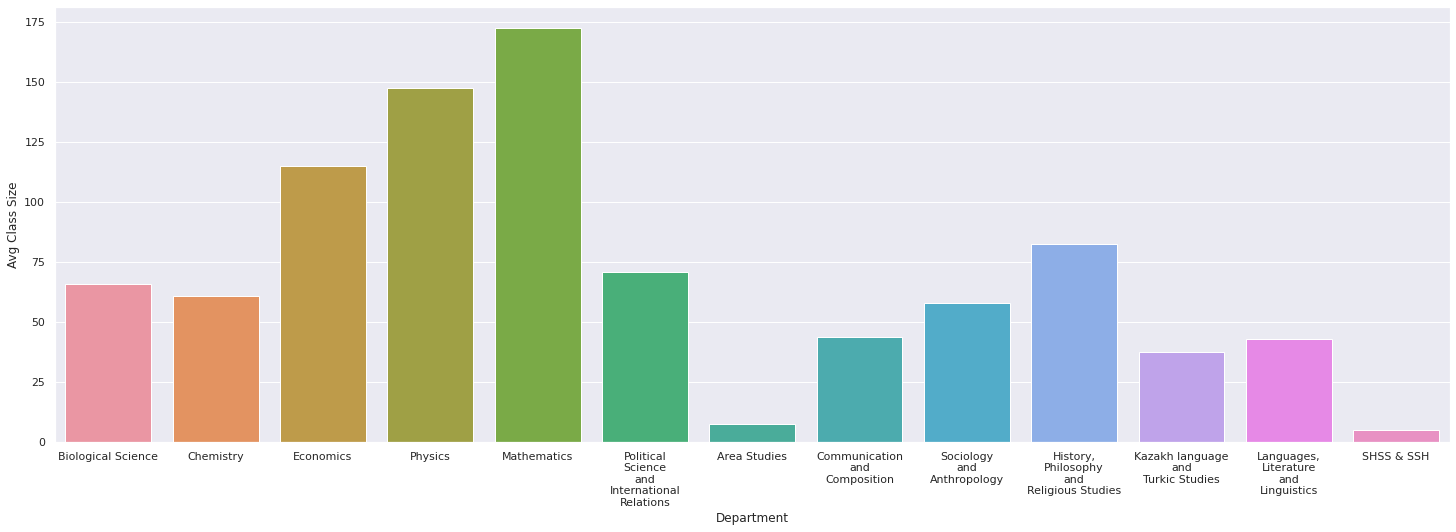

In [20]:
plt.figure(figsize = (25, 8))
sns.barplot(x = 'Department', y = 'Avg Class Size', data = pd_acs)
plt.show()

3. Test the hypothesis:
<center>
$H_0$: ACS in Math = ACS in all other depts
<br>
$H_1$: ACS in Math > ACS in all other depts
<center>

__Honestly, I didn't study and didn't use any of the hypotheses tests before but I would like to try.__
<br><br>
$H_0$ claims that the teaching load for Math departments is (approx.) equal to the others'. On the other hand, $H_1$ says that the mathematicians have a greater teaching load.
<br><br>
Looking at the bar chart above, we see that the teaching load for the Math department is the highest, which contradicts $H_0$ thus we reject it and support $H_1$.